Importing important modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

Loading and viewing data

In [2]:
df = pd.read_csv('internship_train.csv') 
df.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,...,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,...,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,...,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,...,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,...,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304


In [3]:
df_test = pd.read_csv('internship_hidden_test.csv') 
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,259,388,402,340,156,382,3.316625,0.218760,1,164,...,7.163474,10.227235,0.889111,9.190222,4.670908,0.931525,7.634177,0.158196,13.432551,2.511191
1,441,192,381,421,452,123,-8.888194,0.700228,0,349,...,10.619064,9.339161,4.221861,0.595563,13.865748,0.328453,11.507599,9.107966,1.302407,11.105604
2,83,129,107,156,247,191,2.645751,0.494556,1,297,...,1.819890,10.670237,10.350867,5.134417,5.898995,8.374986,4.638049,3.160023,2.243799,5.073030
3,183,438,191,116,491,403,-6.164414,0.511117,0,272,...,4.168135,12.782579,0.513072,0.321295,11.334062,11.735511,1.911520,8.365676,4.877288,11.601819
4,449,156,310,188,279,465,8.000000,0.756416,1,90,...,7.908122,1.140498,14.165074,7.688796,5.079241,8.152186,1.680403,13.215111,5.823109,1.038015


In [4]:
df.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

Ok, there is pretty much of data, so let's see if there is any correlation

In [5]:
print("max correlation = ", np.max(df.corr()['target'][:-2]))
print("min correlation = ", np.min(df.corr()['target'][:-2]))

max correlation =  0.012102971847687905
min correlation =  -0.007215841356660186


Unfortunately, none.

Let's discover most mutuale features by SelectingKBest function

In [6]:
X = df.drop('target', axis=1)
Y = df['target']

best_features= SelectKBest(score_func=mutual_info_regression, k='all')
fit= best_features.fit(X,Y)

df_scores= pd.DataFrame(fit.scores_)
df_columns= pd.DataFrame(X.columns)

features_scores= pd.concat([df_columns, df_scores], axis=1)
features_scores.columns= ['Features', 'Score']
features_scores.sort_values(by = 'Score', ascending=False)[:10]

,Features,Score
6,6,4.602137
7,7,1.274221
12,12,0.006779
29,29,0.005362
22,22,0.004538
23,23,0.004287
2,2,0.003428
28,28,0.003347
33,33,0.003322
0,0,0.002670


Now we can see, that is some features are mutuale. 

Let's try use RandomForestRegressor with all of them, only first, two best and 3 best and compare the result

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=None)
my_rf = RandomForestRegressor(max_samples=100, n_estimators=300)
mses=[]
rmses=[]
for _ in range(10):
    my_rf.fit(X_train, y_train)
    y_pred = my_rf.predict(X_test)
    prediction = my_rf.predict(X_test)
    mse = mean_squared_error(y_test, prediction)
    rmse = mse**.5
    mses.append(mse)
    rmses.append(rmse)
res_all = [np.average(mses),np.average(rmse)]
print(f'AVG MSE = {res_all[0]}')
print(f'AVG RMSE = {res_all[1]}')

AVG MSE = 3.227771965119783
AVG RMSE = 1.768880907214523


In [8]:
x_best_1 = X[['6']]
X_train, X_test, y_train, y_test = train_test_split(x_best_1, Y, test_size=0.4, random_state=None)
my_rf_best_1 = RandomForestRegressor(max_samples=100, n_estimators=300)
mses_best_1 = []
rmses_best_1 = []
for _ in range(10):
    my_rf_best_1.fit(X_train, y_train)
    y_pred = my_rf_best_1.predict(X_test)
    prediction = my_rf_best_1.predict(X_test)
    mse = mean_squared_error(y_test, prediction)
    rmse = mse**.5
    mses_best_1.append(mse)
    rmses_best_1.append(rmse)
res_best_1 = [np.average(mses_best_1), np.average(rmses_best_1)]
print(f'AVG MSE = {res_best_1[0]}')
print(f'AVG RMSE = {res_best_1[1]}')

AVG MSE = 0.19291321868612474
AVG RMSE = 0.4392026582232281


In [9]:
x_best_2 = X[['6', '7']]
X_train, X_test, y_train, y_test = train_test_split(x_best_2, Y, test_size=0.4, random_state=None)
my_rf_best_2 = RandomForestRegressor(max_samples=100, n_estimators=300)
mses_best_2 = []
rmses_best_2 = []
for _ in range(10):
    my_rf_best_2.fit(X_train, y_train)
    y_pred = my_rf_best_2.predict(X_test)
    prediction = my_rf_best_2.predict(X_test)
    mse = mean_squared_error(y_test, prediction)
    rmse = mse**.5
    mses_best_2.append(mse)
    rmses_best_2.append(rmse)
res_best_2 = [np.average(mses_best_2), np.average(rmses_best_2)]
print(f'AVG MSE = {res_best_2[0]}')
print(f'AVG RMSE = {res_best_2[1]}')

AVG MSE = 0.2907048972122286
AVG RMSE = 0.5390358405790688


In [10]:
x_best_3 = X[['7','12','6']]
X_train, X_test, y_train, y_test = train_test_split(x_best_3, Y, test_size=0.4, random_state=None)
my_rf_best_3 = RandomForestRegressor(max_samples=100, n_estimators=300)
mses_best_3 = []
rmses_best_3 = []
for _ in range(10):
    my_rf_best_3.fit(X_train, y_train)
    y_pred = my_rf_best_3.predict(X_test)
    prediction = my_rf_best_3.predict(X_test)
    mse = mean_squared_error(y_test, prediction)
    rmse = mse**.5
    mses_best_3.append(mse)
    rmses_best_3.append(rmse)
res_best_3 = [np.average(mses_best_3), np.average(rmses_best_3)]
print(f'AVG MSE = {res_best_3[0]}')
print(f'AVG RMSE = {res_best_3[1]}')

AVG MSE = 0.41666168084678334
AVG RMSE = 0.6452924446403471


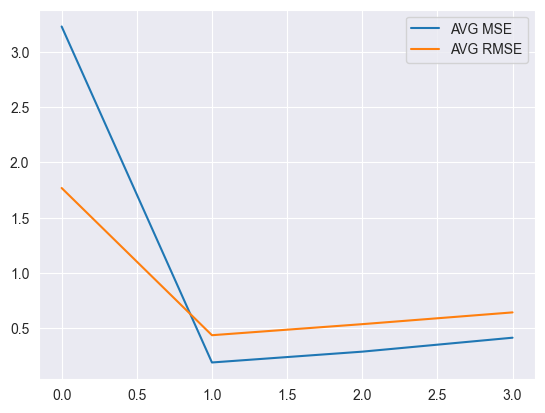

In [11]:
# plotting the results
sns.set_style('darkgrid')
sns.lineplot(x=[0,1,2,3],y=[res_all[0], res_best_1[0], res_best_2[0], res_best_3[0]], label='AVG MSE')
sns.lineplot(x=[0,1,2,3],y=[res_all[1], res_best_1[1], res_best_2[1], res_best_3[1]], label='AVG RMSE')
plt.show()

We can see, that current model gives quite accurate result, according to RMSE.

The best result - with only 1 feature. This model can be ungerfitted and we can see, that the model with 2 features gives not much worse result.

But underfitting can be dangerous for model performance. So let's save results for models with 1 and 2 features

In [12]:
final_model = RandomForestRegressor(max_samples=100, n_estimators=300)
final_model.fit(x_best_1, Y)
prediction = final_model.predict(df_test[['6']])
print(prediction)
df_pred = pd.DataFrame(prediction)
df_pred.to_csv("predictions_best_1.csv")

[11.72928229 79.78864079  7.77408768 ... 22.70790171 16.79033508
 91.92009234]


In [13]:
final_model = RandomForestRegressor(max_samples=100, n_estimators=300)
final_model.fit(x_best_2, Y)
prediction = final_model.predict(df_test[['6', '7']])
print(prediction)
df_pred = pd.DataFrame(prediction)
df_pred.to_csv("predictions_best_2.csv")

[11.48466119 79.79188165  7.76291287 ... 22.41123442 16.78879498
 91.96612107]


That's all

Thank you for your attention